In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

train_df = pd.read_csv("sample_data/training.csv")
test_df = pd.read_csv("sample_data/testing.csv")

# **Временной ряд и скользящие статистики**

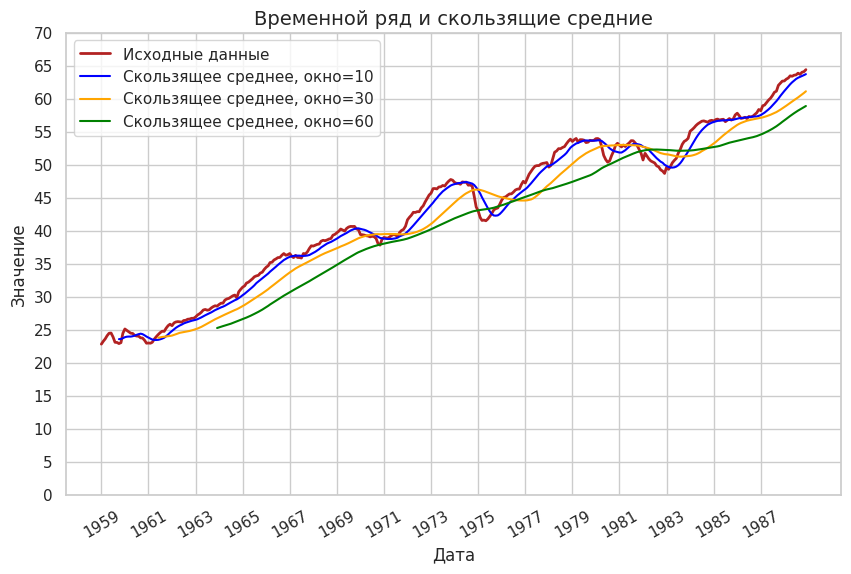

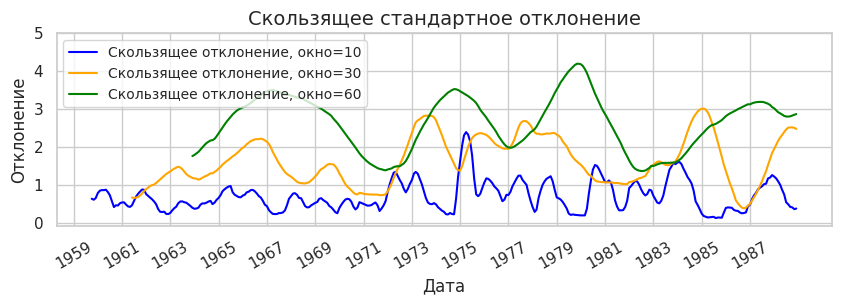

In [4]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_dates = train_df['Date']

sns.set_theme(style="whitegrid")
window_sizes = [10, 30, 60]
#cкользящие средние
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=train_dates, y=train_df['Value'], label="Исходные данные", color="firebrick", linewidth=2)
colors = ["blue", "orange", "green"]
for window, color in zip(window_sizes, colors):
    rolling_mean = train_df['Value'].rolling(window=window).mean()
    sns.lineplot(x=train_dates, y=rolling_mean, label=f"Скользящее среднее, окно={window}", color=color)

freq = "2YS"
plt.xticks(pd.date_range(train_dates.min(), train_dates.max(), freq=freq), [ys.year for ys in pd.date_range(train_dates.min(), train_dates.max(), freq=freq)], rotation=30)
plt.yticks(np.arange(0, 71, step=5))

plt.legend(loc='best')
plt.title('Временной ряд и скользящие средние', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.show()

#cкользящее отклонение
fig, ax = plt.subplots(figsize=(10, 2.5))
for window, color in zip(window_sizes, colors):
    rolling_std = train_df['Value'].rolling(window=window).std()
    sns.lineplot(x=train_dates, y=rolling_std, label=f"Скользящее отклонение, окно={window}", color=color)

plt.xticks(pd.date_range(train_dates.min(), train_dates.max(), freq=freq), [ys.year for ys in pd.date_range(train_dates.min(), train_dates.max(), freq=freq)], rotation=30)
plt.yticks(np.linspace(0, 5, 6))

plt.legend(loc='best', fontsize=10)
plt.title('Скользящее стандартное отклонение', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отклонение', fontsize=12)
plt.show()


Объеденим тестовую и обучающие выборки:

In [5]:

test_df['Date'] = pd.to_datetime(test_df['Date'])
test_dates = test_df['Date']
combined_dates = pd.concat([train_dates, test_dates])
combined_values = pd.concat([train_df['Value'], test_df['Value']])
combined_dates = pd.DatetimeIndex(combined_dates)


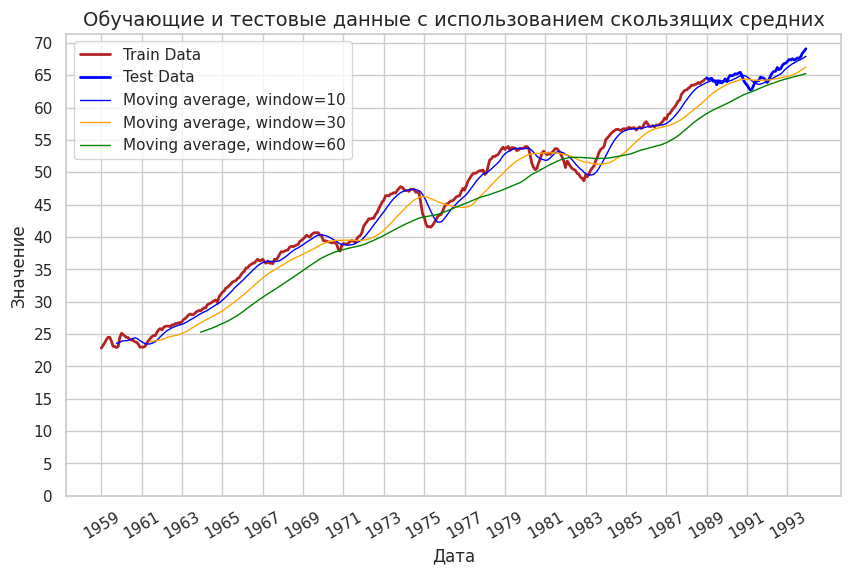

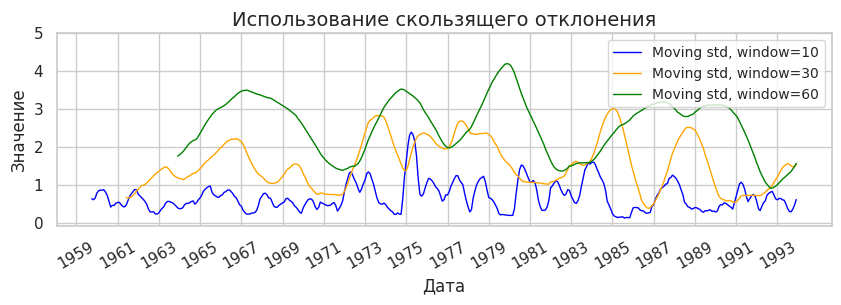

In [6]:

combined_dates = pd.concat([train_dates, test_dates], ignore_index=True)
combined_values = pd.concat([train_df['Value'], test_df['Value']], ignore_index=True)

sns.set_theme(style="whitegrid")

#cкользящие средние
window_sizes = [10, 30, 60]
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x=train_dates, y=train_df['Value'], label="Train Data", color="firebrick", linewidth=2)
sns.lineplot(x=test_dates, y=test_df['Value'], label="Test Data", color="blue", linewidth=2)

colors = ["blue", "orange", "green"]
for window, color in zip(window_sizes, colors):
    rolling_mean = combined_values.rolling(window=window).mean()
    sns.lineplot(x=combined_dates, y=rolling_mean, label=f"Moving average, window={window}", color=color, linewidth=1)

freq = "2YS"
plt.xticks(pd.date_range(train_dates.min(), test_dates.max(), freq=freq), [ys.year for ys in pd.date_range(train_dates.min(), test_dates.max(), freq=freq)], rotation=30)
plt.yticks(np.arange(0, 71, step=5))

plt.legend(loc='best')
plt.title('Обучающие и тестовые данные с использованием скользящих средних', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.show()

# cкользящие отклонение
fig, ax = plt.subplots(figsize=(10, 2.5))

for window, color in zip(window_sizes, colors):
    rolling_std = combined_values.rolling(window=window).std()
    sns.lineplot(x=combined_dates, y=rolling_std, label=f"Moving std, window={window}", color=color, linewidth=1)

plt.xticks(pd.date_range(train_dates.min(), test_dates.max(), freq=freq), [ys.year for ys in pd.date_range(train_dates.min(), test_dates.max(), freq=freq)], rotation=30)
plt.yticks(np.linspace(0, 5, 6))

plt.legend(loc='best', fontsize=10)
plt.title('Использование скользящего отклонения', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

# функция для теста Дики-Фуллера
def adf_test(series, name="Временной ряд"):

    result = adfuller(series.dropna())
    print(f"Результаты теста Дики-Фуллера для {name}:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print("  Критические значения:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.4f}")
    if result[1] < 0.05:
        print(f"  p-value меньше 0.05. Нулевая гипотеза отвергнута, {name} стационарен.\n")
    else:
        print(f"  p-value больше 0.05. Нулевая гипотеза не отвергнута, {name} нестационарен.\n")

adf_test(train_df['Value'], name="Train Data")
adf_test(test_df['Value'], name="Test Data")


Результаты теста Дики-Фуллера для Train Data:
  ADF Statistic: -0.2534
  p-value: 0.9319
  Критические значения:
    1%: -3.4490
    5%: -2.8697
    10%: -2.5711
  p-value больше 0.05. Нулевая гипотеза не отвергнута, Train Data нестационарен.

Результаты теста Дики-Фуллера для Test Data:
  ADF Statistic: 0.4534
  p-value: 0.9834
  Критические значения:
    1%: -3.5485
    5%: -2.9128
    10%: -2.5941
  p-value больше 0.05. Нулевая гипотеза не отвергнута, Test Data нестационарен.



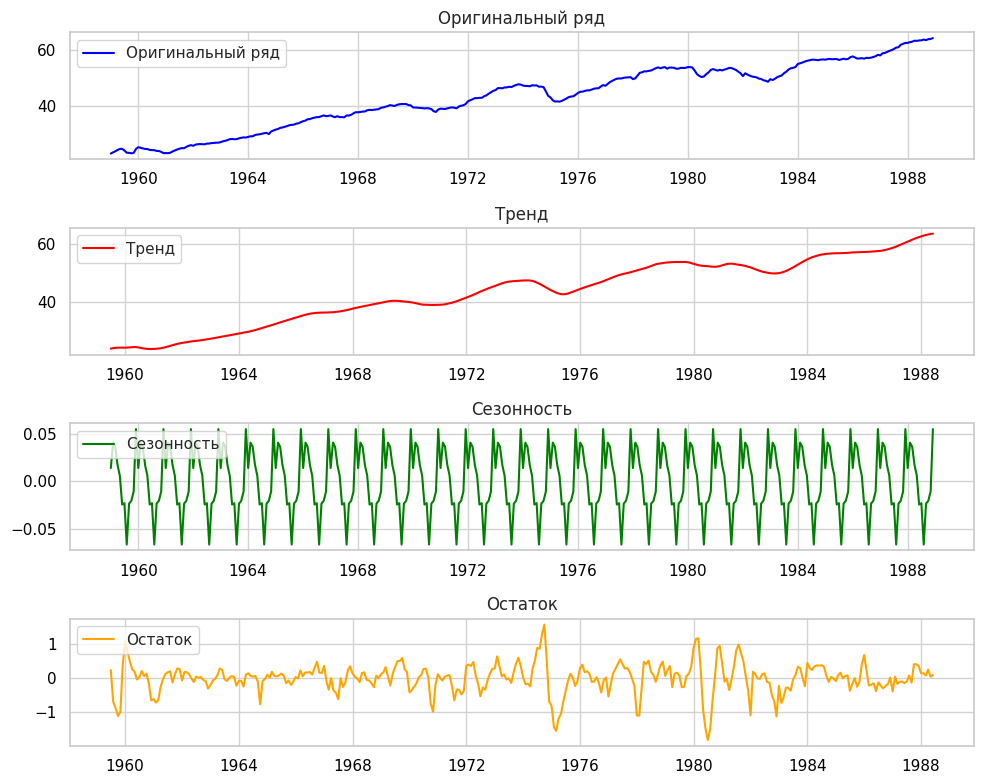

In [8]:
indexed = train_df.set_index('Date')
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 8))
# оригинальный ряд
axes[0].plot(indexed, label='Оригинальный ряд', color="blue")
axes[0].set_title("Оригинальный ряд")
axes[0].legend(loc='upper left')
axes[0].grid(color="lightgrey")
axes[0].set_facecolor('white')

# тренд
axes[1].plot(trend, label='Тренд', color="red")
axes[1].set_title("Тренд")
axes[1].legend(loc='upper left')
axes[1].grid(color="lightgrey")
axes[1].set_facecolor('white')

# сезонность
axes[2].plot(seasonal, label='Сезонность', color="green")
axes[2].set_title("Сезонность")
axes[2].legend(loc='upper left')
axes[2].grid(color="lightgrey")
axes[2].set_facecolor('white')

# остатки
axes[3].plot(residual, label='Остаток', color="orange")
axes[3].set_title("Остаток")
axes[3].legend(loc='upper left')
axes[3].grid(color="lightgrey")
axes[3].set_facecolor('white')

for ax in axes:
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()


In [ ]:
adf_test(trend, name="Trend Component")

Результаты теста Дики-Фуллера для Trend Component:
  ADF Statistic: -0.8616
  p-value: 0.8004
  Критические значения:
    1%: -3.4503
    5%: -2.8703
    10%: -2.5715
  p-value больше 0.05. Нулевая гипотеза не отвергнута, Trend Component нестационарен.



In [ ]:
adf_test(seasonal, name="Seasonal Component")

Результаты теста Дики-Фуллера для Seasonal Component:
  ADF Statistic: -540389567101099.6875
  p-value: 0.0000
  Критические значения:
    1%: -3.4493
    5%: -2.8699
    10%: -2.5712
  p-value меньше 0.05. Нулевая гипотеза отвергнута, Seasonal Component стационарен.



In [ ]:
adf_test(residual, name="Residual Component")

Результаты теста Дики-Фуллера для Residual Component:
  ADF Statistic: -7.4856
  p-value: 0.0000
  Критические значения:
    1%: -3.4496
    5%: -2.8700
    10%: -2.5713
  p-value меньше 0.05. Нулевая гипотеза отвергнута, Residual Component стационарен.



<font color='MediumOrchid'>**Вывод:**</font>
 - Сезонность стационарна
 - Тренд нестационарен
 - Остаток стационарен

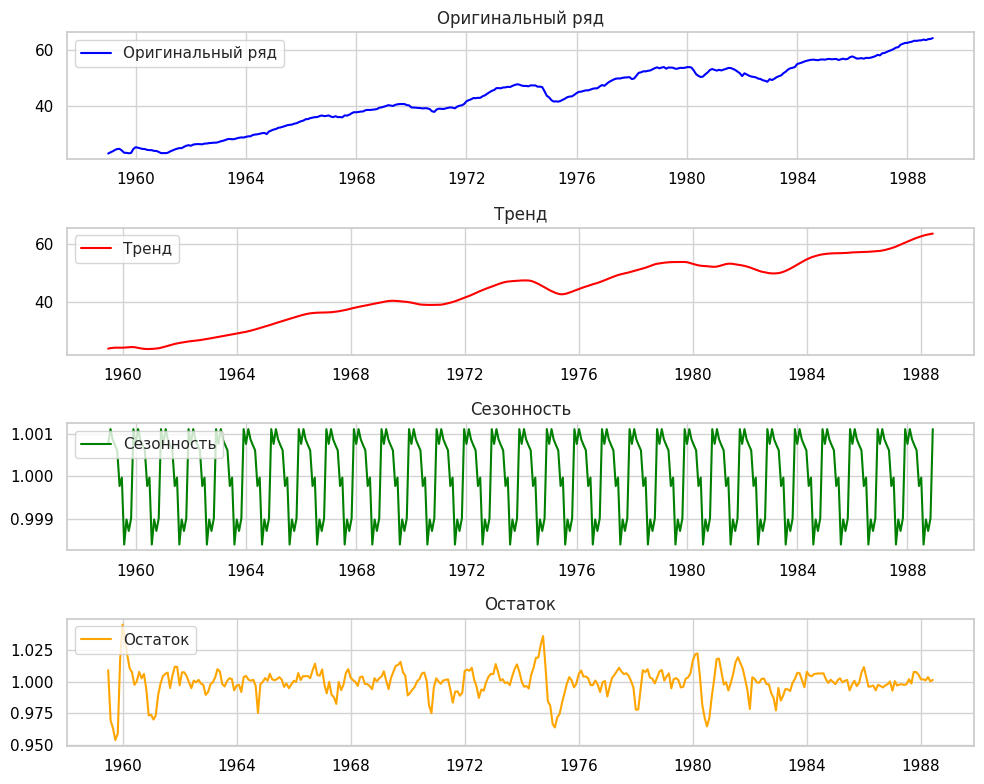

In [ ]:
indexed = train_df.set_index('Date')
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# визуализация компонент
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# оригинальный ряд
axes[0].plot(indexed, label='Оригинальный ряд', color="blue")
axes[0].set_title("Оригинальный ряд")
axes[0].legend(loc='upper left')
axes[0].grid(color="lightgrey")
axes[0].set_facecolor('white')

# тренд
axes[1].plot(trend, label='Тренд', color="red")
axes[1].set_title("Тренд")
axes[1].legend(loc='upper left')
axes[1].grid(color="lightgrey")
axes[1].set_facecolor('white')

# сезонность
axes[2].plot(seasonal, label='Сезонность', color="green")
axes[2].set_title("Сезонность")
axes[2].legend(loc='upper left')
axes[2].grid(color="lightgrey")
axes[2].set_facecolor('white')

# остатки
axes[3].plot(residual, label='Остаток', color="orange")
axes[3].set_title("Остаток")
axes[3].legend(loc='upper left')
axes[3].grid(color="lightgrey")
axes[3].set_facecolor('white')

for ax in axes:
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

In [ ]:
adf_test(trend, name="Trend Component")

Результаты теста Дики-Фуллера для Trend Component:
  ADF Statistic: -0.8616
  p-value: 0.8004
  Критические значения:
    1%: -3.4503
    5%: -2.8703
    10%: -2.5715
  p-value больше 0.05. Нулевая гипотеза не отвергнута, Trend Component нестационарен.



In [ ]:
adf_test(seasonal, name="Seasonal Component")

Результаты теста Дики-Фуллера для Seasonal Component:
  ADF Statistic: -39820684499748.5156
  p-value: 0.0000
  Критические значения:
    1%: -3.4496
    5%: -2.8700
    10%: -2.5713
  p-value меньше 0.05. Нулевая гипотеза отвергнута, Seasonal Component стационарен.



In [ ]:
adf_test(residual, name="Residual Component")

Результаты теста Дики-Фуллера для Residual Component:
  ADF Statistic: -7.4661
  p-value: 0.0000
  Критические значения:
    1%: -3.4496
    5%: -2.8700
    10%: -2.5713
  p-value меньше 0.05. Нулевая гипотеза отвергнута, Residual Component стационарен.



<font color='MediumOrchid'>**Вывод:**</font>
 - Сезонность стационарна
 - Тренд нестационарен
 - Остаток стационарен


# **Интегрируемость**



In [ ]:
newindexed = indexed.diff()  #дифферинцируем

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(newindexed.dropna(), model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# оригинальный ряд
axes[0].plot(newindexed, label='Оригинальный ряд', color="blue")
axes[0].set_title("Оригинальный ряд")
axes[0].legend(loc='upper left')
axes[0].grid(color="lightgrey")
axes[0].set_facecolor('white')

# тренд
axes[1].plot(trend, label='Тренд', color="red")
axes[1].set_title("Тренд")
axes[1].legend(loc='upper left')
axes[1].grid(color="lightgrey")
axes[1].set_facecolor('white')

# сезонность
axes[2].plot(seasonal, label='Сезонность', color="green")
axes[2].set_title("Сезонность")
axes[2].legend(loc='upper left')
axes[2].grid(color="lightgrey")
axes[2].set_facecolor('white')

# остатки
axes[3].plot(residual, label='Остаток', color="orange")
axes[3].set_title("Остаток")
axes[3].legend(loc='upper left')
axes[3].grid(color="lightgrey")
axes[3].set_facecolor('white')

for ax in axes:
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

<font color='MediumOrchid'>**Вывод:**</font>  Мультипликативная модель не подходит, тогда попробуем использовать аддитивную.

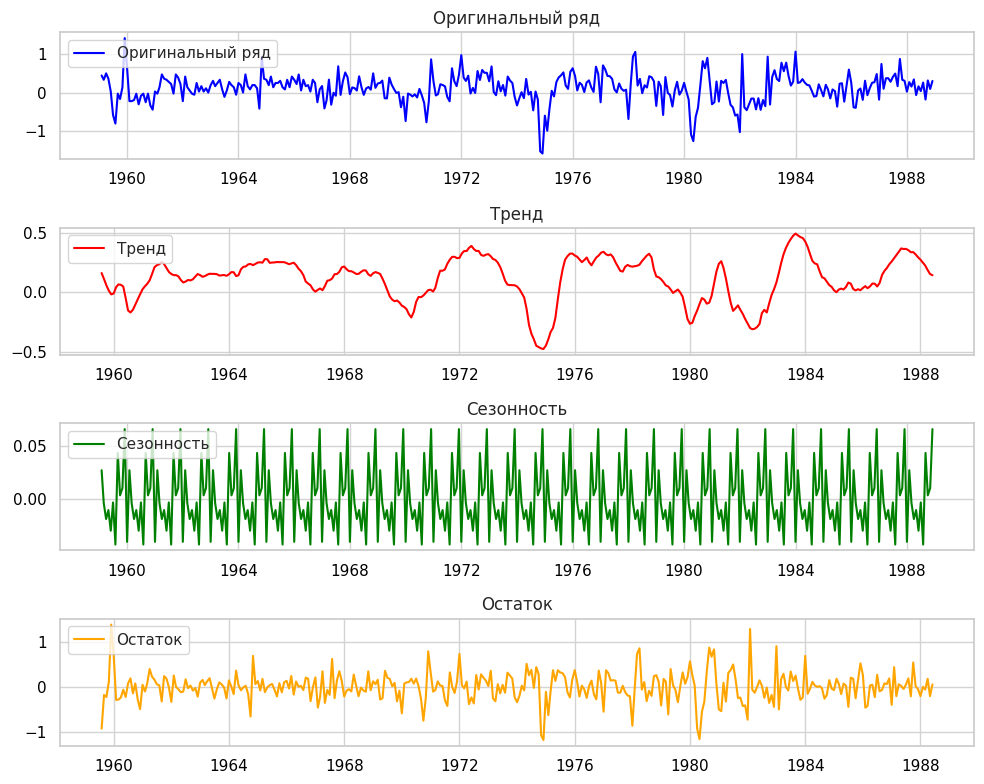

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(newindexed.dropna(), model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# оригинальный ряд
axes[0].plot(newindexed, label='Оригинальный ряд', color="blue")
axes[0].set_title("Оригинальный ряд")
axes[0].legend(loc='upper left')
axes[0].grid(color="lightgrey")
axes[0].set_facecolor('white')

# тренд
axes[1].plot(trend, label='Тренд', color="red")
axes[1].set_title("Тренд")
axes[1].legend(loc='upper left')
axes[1].grid(color="lightgrey")
axes[1].set_facecolor('white')

# сезонность
axes[2].plot(seasonal, label='Сезонность', color="green")
axes[2].set_title("Сезонность")
axes[2].legend(loc='upper left')
axes[2].grid(color="lightgrey")
axes[2].set_facecolor('white')

# остатки
axes[3].plot(residual, label='Остаток', color="orange")
axes[3].set_title("Остаток")
axes[3].legend(loc='upper left')
axes[3].grid(color="lightgrey")
axes[3].set_facecolor('white')


for ax in axes:
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

In [ ]:
adf_test(trend, name="Trend Component")

Результаты теста Дики-Фуллера для Trend Component:
  ADF Statistic: -4.6426
  p-value: 0.0001
  Критические значения:
    1%: -3.4504
    5%: -2.8704
    10%: -2.5715
  p-value меньше 0.05. Нулевая гипотеза отвергнута, Trend Component стационарен.



In [ ]:
adf_test(seasonal, name="Seasonal Component")

Результаты теста Дики-Фуллера для Seasonal Component:
  ADF Statistic: -490251657218254.0000
  p-value: 0.0000
  Критические значения:
    1%: -3.4494
    5%: -2.8699
    10%: -2.5712
  p-value меньше 0.05. Нулевая гипотеза отвергнута, Seasonal Component стационарен.



In [ ]:
adf_test(residual, name="Residual Component")

Результаты теста Дики-Фуллера для Residual Component:
  ADF Statistic: -8.1863
  p-value: 0.0000
  Критические значения:
    1%: -3.4503
    5%: -2.8703
    10%: -2.5715
  p-value меньше 0.05. Нулевая гипотеза отвергнута, Residual Component стационарен.



<font color='MediumOrchid'>**Вывод:**</font>  После дифференцирования ряда, он стал стационарным, значит, он является интегрированным порядка 1.

# МОДЕЛЬ ARIMA

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


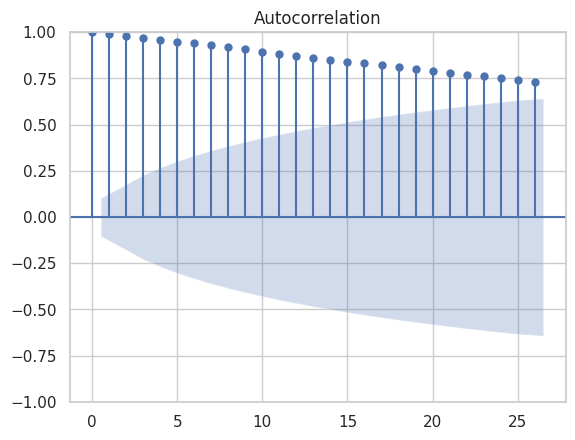

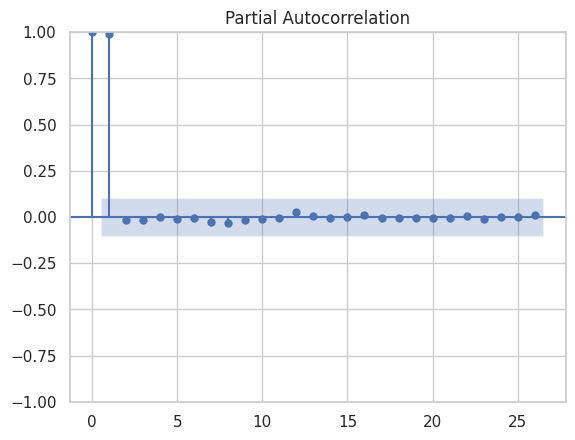

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(indexed.dropna())
plot_pacf(indexed.dropna())
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA

d = 1
params = [(p, d, q) for p in range(3) for q in range(25)]
av_scores = []

n_splits = 3
for param_tuple in params:
    r2scores = []
    tscv = TimeSeriesSplit(n_splits=n_splits)
    for train_index, test_index in tscv.split(indexed):

        X_train, X_test = indexed.iloc[train_index], indexed.iloc[test_index]а
        X_train.index.freq = "MS"
        X_test.index.freq = "MS"

        model = ARIMA(X_train, order=param_tuple).fit()
        y_pred = model.predict(start=X_test.index[0], end=X_test.index[-1])
        r2scores.append(r2_score(y_true=X_test, y_pred=y_pred))

    av_scores.append(np.mean(np.array(r2scores)))

print(av_scores)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

[-0.8286470279649082, -0.8302715269592174, -0.8024960070569005, -0.7947148640368781, -0.7599265795737784, -0.7697467074140855, -0.802433267158189, -0.7668513519044167, -0.6797087849909998, -0.680999683759392, -0.6182652337147484, -0.5671231530117311, -0.6626424497516842, -0.6038795622929495, -0.6481582027205208, -0.6328868717654687, -0.5390731105094347, -0.51839412407702, -0.4288745010894304, -0.47787744133408827, -0.49537035530432166, -0.5842959369082643, -0.6580677478049699, -0.49395850385816303, -0.5436787162777414, -0.768342232130132, -0.7334515056862978, -0.1917018956181299, -0.27893719000334205, -0.18387767626733678, -0.5355638436089207, -0.5663142279907571, -0.5701423600588095, -0.5239113464600706, 0.0831417997843223, 0.0051070481848842775, -0.0070034030555133535, -0.0987567865735145, 0.02199890816406021, 0.08291453021910873, -0.37567952633213436, -0.006492499435172309, -0.398590092337058, -0.501250860598769, -0.39805495973593236, -0.6341630506712413, -0.6251516951357097, -0.656

In [ ]:
print(av_scores.index(max(av_scores)))

34


In [ ]:
params[34]

(1, 1, 9)

Это параметры (p, d, q) для модели ARIMA были выбраны как оптимальные на основе результата кросс-валидации и оценки R².

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


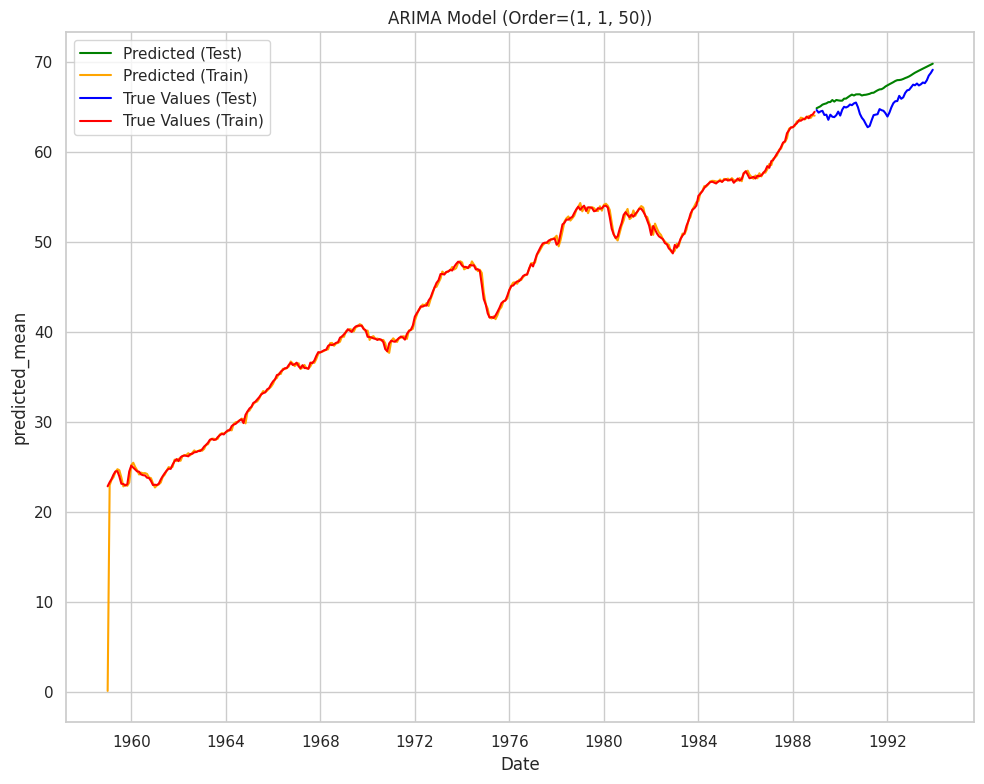

R² Score for the model ARIMA(1, 1, 50): -0.5804


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

if 'Date' in train_df.columns:
    train_df['Date'] = pd.to_datetime(train_df['Date'])
    train_df.set_index('Date', inplace=True)

if 'Date' in test_df.columns:
    test_df['Date'] = pd.to_datetime(test_df['Date'])
    test_df.set_index('Date', inplace=True)

train_df.index.freq = 'MS'
test_df.index.freq = 'MS'

order = (1, 1, 50)
model = ARIMA(indexed, order=order, trend='t').fit(method_kwargs={'maxiter': 100})
y_pred = model.predict(start=test_df.index[0], end=test_df.index[-1])
y_pred_full = model.predict(start=combined_dates[0], end=combined_dates.index[-1])

plt.figure(figsize=(10, 8))
sns.lineplot(x=test_df.index, y=y_pred, label="Predicted (Test)", color="green")
sns.lineplot(x=train_df.index, y=y_pred_full[:len(train_df)], label="Predicted (Train)", color="orange")
plt.plot(test_df.index, test_df['Value'], label="True Values (Test)", color="blue")
plt.plot(train_df.index, train_df['Value'], label="True Values (Train)", color="red")
plt.title(f"ARIMA Model (Order={order})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

r2 = r2_score(test_df['Value'], y_pred)
print(f"R² Score for the model ARIMA{order}: {r2:.4f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


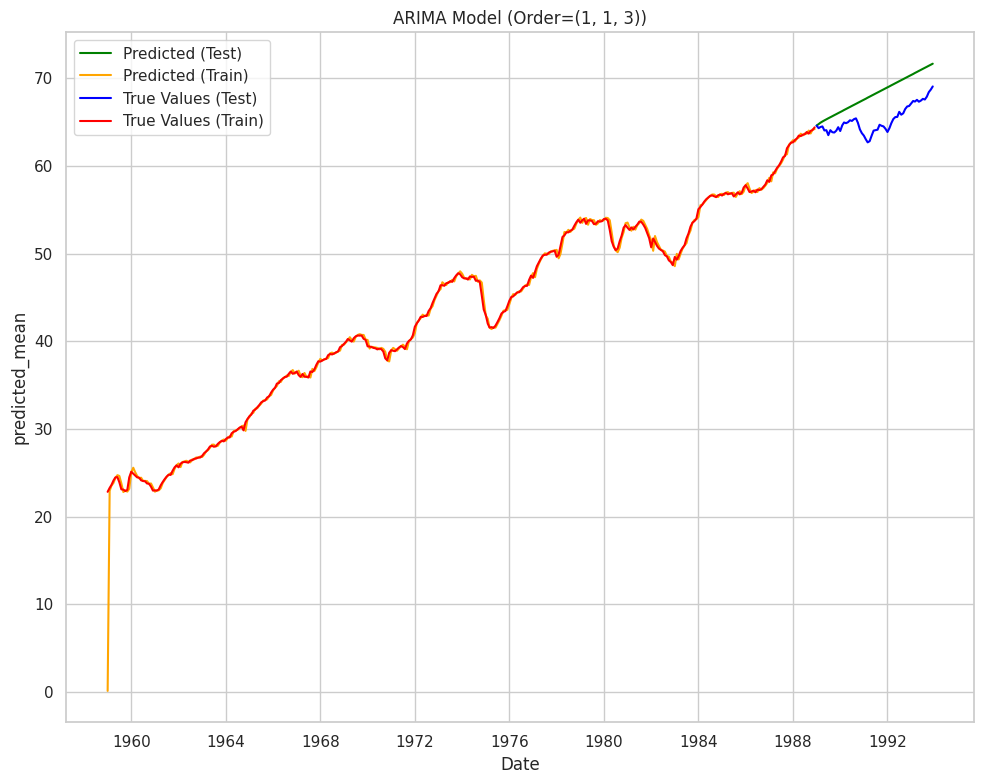

R² Score for the model ARIMA(1, 1, 3): -3.3202


In [30]:
if 'Date' in train_df.columns:
    train_df['Date'] = pd.to_datetime(train_df['Date'])
    train_df.set_index('Date', inplace=True)

if 'Date' in test_df.columns:
    test_df['Date'] = pd.to_datetime(test_df['Date'])
    test_df.set_index('Date', inplace=True)

train_df.index.freq = 'MS'
test_df.index.freq = 'MS'

order = (1, 1, 9)
model = ARIMA(indexed, order=order, trend='t').fit(method_kwargs={'maxiter': 100})
y_pred = model.predict(start=test_df.index[0], end=test_df.index[-1])
y_pred_full = model.predict(start=combined_dates[0], end=combined_dates.index[-1])

plt.figure(figsize=(10, 8))
sns.lineplot(x=test_df.index, y=y_pred, label="Predicted (Test)", color="green")
sns.lineplot(x=train_df.index, y=y_pred_full[:len(train_df)], label="Predicted (Train)", color="orange")
plt.plot(test_df.index, test_df['Value'], label="True Values (Test)", color="blue")
plt.plot(train_df.index, train_df['Value'], label="True Values (Train)", color="red")
plt.title(f"ARIMA Model (Order={order})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

r2 = r2_score(test_df['Value'], y_pred)
print(f"R² Score for the model ARIMA{order}: {r2:.4f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


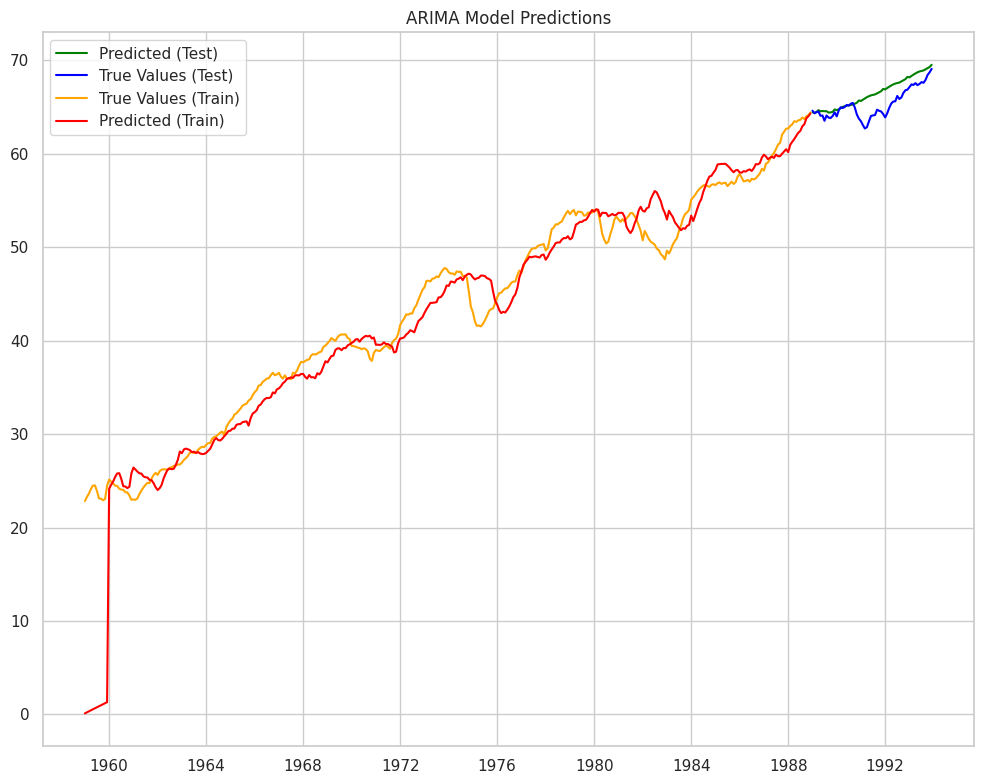

R² Score: 0.0296


In [ ]:
model = ARIMA(indexed, seasonal_order=(1, 1, 3, 12), trend='t').fit(method_kwargs={'maxiter': 100})
y_pred = model.predict(start=test_df.index[0], end=test_df.index[-1])
y_pred_full = model.predict(start=combined_dates.index[0], end=combined_dates.index[-1])

plt.figure(figsize=(10, 8))
plt.plot(test_df.index, y_pred, label="Predicted (Test)", color="green")
plt.plot(test_df.index, test_df['Value'], label="True Values (Test)", color="blue")
plt.plot(train_df.index, train_df['Value'], label="True Values (Train)", color="orange")
plt.plot(train_df.index, y_pred_full[:len(train_df)], label="Predicted (Train)", color="red")

plt.title("ARIMA Model Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

r2 = r2_score(test_df['Value'], y_pred)
print(f"R² Score: {r2:.4f}")


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from itertools import product
import warnings
Qs = range(0, 3)
qs = range(0, 11)
Ps = range(0, 1)
ps = range(0, 2)
d = 1
D = 0
S = range(12,13)
parameters = product(ps, qs, Ps, Qs, S)
parameters_list = list(parameters)
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        model = SARIMAX(train_df['Value'], order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], param[4])).fit(disp=False)
        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param

        results.append([param, aic])
    except Exception as e:
        print(f"Warning parameters {param}: {e}")
        continue

warnings.filterwarnings('default')


result_table = pd.DataFrame(results, columns=['parameters', 'aic']).sort_values(by='aic')
print("ТОП-5 моделей:")
print(result_table.head())
print(f"\nThe best model: parameters {best_param}, AIC: {best_aic}")



ТОП-5 моделей:
          parameters         aic
50  (1, 5, 0, 2, 12)  236.764484
53  (1, 6, 0, 2, 12)  237.941258
56  (1, 7, 0, 2, 12)  239.664779
59  (1, 8, 0, 2, 12)  241.023352
62  (1, 9, 0, 2, 12)  242.882217

The best model: parameters (1, 5, 0, 2, 12), AIC: 236.7644840244459


Лучшие параметры по критерию Акаике:  p = 1, q = 5, P = 0, Q = 2, S = 12

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from itertools import product
import warnings

qs = range(0, 10)
ps = range(0, 3)
d = 1

parameters = product(ps, qs)
parameters_list = list(parameters)

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        model = ARIMA(train_df['Value'], order=(param[0], d, param[1])).fit()
        aic = model.aic
        results.append([param, aic])
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
            print(f"New best model found: {param}, AIC: {aic:.2f}")
    except Exception as e:
        print(f"Warning parameters: {param}, error: {e}")
        continue

warnings.filterwarnings('default')

if results:
    result_table = DataFrame(results, columns=['parameters', 'aic'])
    print(result_table.sort_values(by='aic', ascending=True).head())
else:
    print("No successful models were fitted.")


New best model found: (0, 0), AIC: 346.93
New best model found: (0, 1), AIC: 287.00
New best model found: (0, 2), AIC: 274.35
New best model found: (0, 3), AIC: 266.97
New best model found: (0, 4), AIC: 253.34
New best model found: (1, 5), AIC: 250.43
   parameters         aic
15     (1, 5)  250.426998
25     (2, 5)  252.249200
4      (0, 4)  253.339954
26     (2, 6)  254.666196
5      (0, 5)  255.306230


Лучшие параметры по критерию Акике  q = 1, d = 1, p = 5.